In [2]:
import yfinance as yf
import pandas as pd

# Baixando os dados históricos do Bitcoin
btc_data = yf.download(tickers="BTC-USD", start="2014-01-01", interval="1d")

# Verificando os dados baixados
print(btc_data.head())


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  


In [30]:
import plotly.express as px

# Baixar dados históricos de Bitcoin (BTC-USD) para o último ano, com intervalo de 1 hora
btc_data = yf.download("BTC-USD", period="1y", interval="1h")

# Verificar se o índice já tem fuso horário
if btc_data.index.tz is None:
    # Se o índice não tiver fuso horário, localize para UTC
    btc_data.index = btc_data.index.tz_localize('UTC')
else:
    # Se já tiver fuso horário, apenas converta para o horário UTC
    btc_data.index = btc_data.index.tz_convert('UTC')

# Adicionar uma coluna com a hora no horário UTC
btc_data['Hour_UTC'] = btc_data.index.hour

# Converter para horário de Brasília (BRT), ajustando para UTC -3
btc_data['Hour_BRT'] = (btc_data['Hour_UTC'] - 3) % 24  # Ajuste para BRT

# Criar colunas para os fusos horários de Ásia (Tóquio), Europa (CET), EUA (East)
btc_data['Hour_Asia'] = (btc_data.index.hour + 9) % 24  # Tóquio (UTC +9)
btc_data['Hour_Europe'] = (btc_data.index.hour + 1) % 24  # Europa Central (UTC +1)
btc_data['Hour_US'] = (btc_data.index.hour - 5) % 24  # EUA (Eastern Time UTC -5)

# Calcular o volume total por hora para cada fuso horário
volume_brazil = btc_data.groupby('Hour_BRT')['Volume'].sum()
volume_asia = btc_data.groupby('Hour_Asia')['Volume'].sum()
volume_europe = btc_data.groupby('Hour_Europe')['Volume'].sum()
volume_us = btc_data.groupby('Hour_US')['Volume'].sum()

# Criar DataFrame com volumes por hora para cada região
hourly_volume = pd.DataFrame({
    'Hour_BRT': volume_brazil.index,
    'Volume_Brazil': volume_brazil.values,
    'Volume_Asia': volume_asia.reindex(volume_brazil.index, fill_value=0).values,
    'Volume_Europe': volume_europe.reindex(volume_brazil.index, fill_value=0).values,
    'Volume_US': volume_us.reindex(volume_brazil.index, fill_value=0).values
})

# Criar o gráfico interativo com Plotly
fig = px.line(hourly_volume, 
              x='Hour_BRT', 
              y=['Volume_Brazil', 'Volume_Asia', 'Volume_Europe', 'Volume_US'],
              title='Volume de Transações de Bitcoin por Hora (Comparação Global com Horário BRT)',
              labels={'Hour_BRT': 'Hora (BRT)', 
                      'Volume_Brazil': 'Volume (Brasil)',
                      'Volume_Asia': 'Volume (Ásia)', 
                      'Volume_Europe': 'Volume (Europa)', 
                      'Volume_US': 'Volume (EUA)'},
              template='plotly_dark')

# Adicionar uma legenda indicando que os dados são do último ano
fig.add_annotation(
    x=0.5,
    y=-0.15,
    xref="paper",
    yref="paper",
    text="Dados de Transações de Bitcoin para o Último Ano",
    showarrow=False,
    font=dict(size=12, color="white"),
    align="center"
)

# Adicionar opções de zoom para semanas, meses, etc.
fig.update_layout(
    xaxis_rangeslider_visible=True,  # Ativar controle de zoom para o eixo x
    xaxis_title='Hora (BRT)',
    yaxis_title='Volume Total de Transações (BTC)',
    hovermode='x unified',
    showlegend=True
)

# Mostrar o gráfico interativo
fig.show()


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


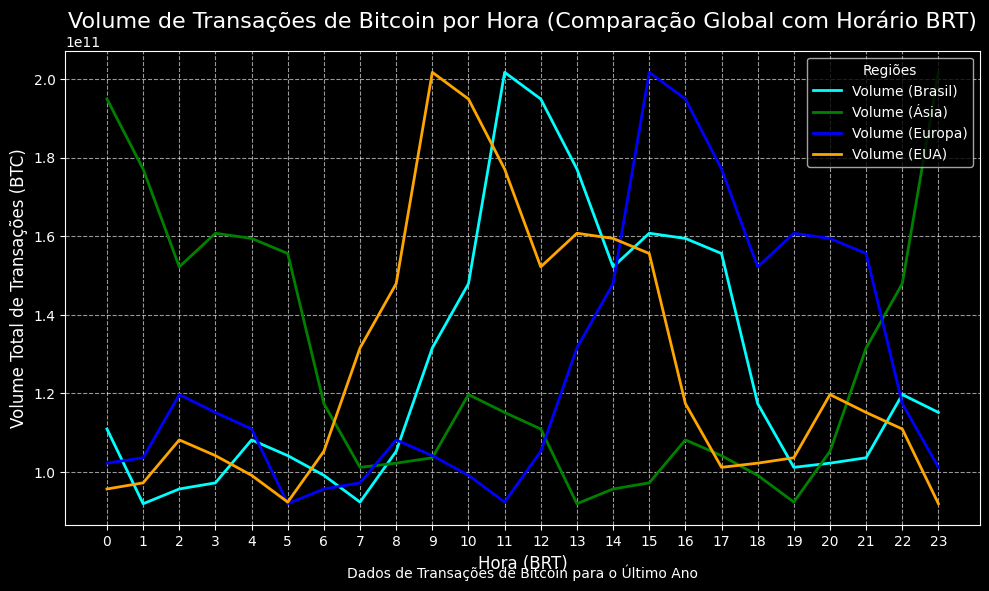

In [16]:
import seaborn as sns


# Baixar dados históricos de Bitcoin (BTC-USD) para o último ano, com intervalo de 1 hora
btc_data = yf.download("BTC-USD", period="1y", interval="1h")

# Verificar se o índice já tem fuso horário
if btc_data.index.tz is None:
    # Se o índice não tiver fuso horário, localize para UTC
    btc_data.index = btc_data.index.tz_localize('UTC')
else:
    # Se já tiver fuso horário, apenas converta para o horário UTC
    btc_data.index = btc_data.index.tz_convert('UTC')

# Adicionar uma coluna com a hora no horário UTC
btc_data['Hour_UTC'] = btc_data.index.hour

# Converter para horário de Brasília (BRT), ajustando para UTC -3
btc_data['Hour_BRT'] = (btc_data['Hour_UTC'] - 3) % 24  # Ajuste para BRT

# Criar colunas para os fusos horários de Ásia (Tóquio), Europa (CET), EUA (East)
btc_data['Hour_Asia'] = (btc_data.index.hour + 9) % 24  # Tóquio (UTC +9)
btc_data['Hour_Europe'] = (btc_data.index.hour + 1) % 24  # Europa Central (UTC +1)
btc_data['Hour_US'] = (btc_data.index.hour - 5) % 24  # EUA (Eastern Time UTC -5)

# Calcular o volume total por hora para cada fuso horário
volume_brazil = btc_data.groupby('Hour_BRT')['Volume'].sum()
volume_asia = btc_data.groupby('Hour_Asia')['Volume'].sum()
volume_europe = btc_data.groupby('Hour_Europe')['Volume'].sum()
volume_us = btc_data.groupby('Hour_US')['Volume'].sum()

# Criar DataFrame com volumes por hora para cada região
hourly_volume = pd.DataFrame({
    'Hour_BRT': volume_brazil.index,
    'Volume_Brazil': volume_brazil.values,
    'Volume_Asia': volume_asia.reindex(volume_brazil.index, fill_value=0).values,
    'Volume_Europe': volume_europe.reindex(volume_brazil.index, fill_value=0).values,
    'Volume_US': volume_us.reindex(volume_brazil.index, fill_value=0).values
})

# Criar o gráfico com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_volume, x='Hour_BRT', y='Volume_Brazil', label='Volume (Brasil)', color='cyan', linewidth=2)
sns.lineplot(data=hourly_volume, x='Hour_BRT', y='Volume_Asia', label='Volume (Ásia)', color='green', linewidth=2)
sns.lineplot(data=hourly_volume, x='Hour_BRT', y='Volume_Europe', label='Volume (Europa)', color='blue', linewidth=2)
sns.lineplot(data=hourly_volume, x='Hour_BRT', y='Volume_US', label='Volume (EUA)', color='orange', linewidth=2)

# Personalizar o gráfico
plt.title('Volume de Transações de Bitcoin por Hora (Comparação Global com Horário BRT)', fontsize=16)
plt.xlabel('Hora (BRT)', fontsize=12)
plt.ylabel('Volume Total de Transações (BTC)', fontsize=12)
plt.xticks(range(0, 24))  # Exibir todas as horas de 0 a 23
plt.grid(True, linestyle='--', alpha=0.6)

# Adicionar legenda
plt.legend(title="Regiões", fontsize=10)

# Adicionar uma anotação informando que os dados são do último ano
plt.annotate("Dados de Transações de Bitcoin para o Último Ano", 
             xy=(0.5, -0.1), xycoords='axes fraction', 
             ha='center', va='center', fontsize=10, color='white')

# Exibir o gráfico
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


Menor taxas de transação em horário de Brasília é às 1:00, com um volume total de 130,425,351,168.00 BTC.


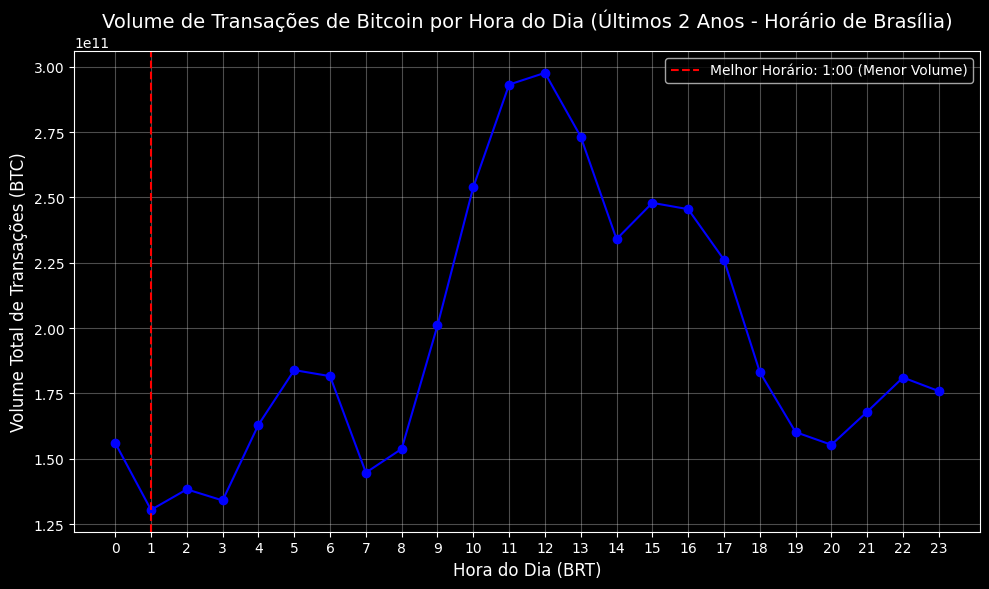

In [31]:
import matplotlib.pyplot as plt

# Baixar dados históricos de Bitcoin (BTC-USD) com intervalo de 1 hora e período de 2 anos
btc_data = yf.download("BTC-USD", period="2y", interval="1h")

# Verificar se o índice já tem fuso horário
if btc_data.index.tz is None:
    # Se o índice não tiver fuso horário, localize para UTC
    btc_data.index = btc_data.index.tz_localize('UTC')
else:
    # Se já tiver fuso horário, apenas converta para o horário de Brasília (BRT)
    btc_data.index = btc_data.index.tz_convert('UTC')

# Converter para o horário de Brasília (BRT)
btc_data.index = btc_data.index.tz_convert('America/Sao_Paulo')

# Adicionar uma coluna com a hora no horário de Brasília (BRT)
btc_data['Hour'] = btc_data.index.hour

# Calcular o volume total por hora
hourly_volume = btc_data.groupby('Hour')['Volume'].sum()

# Identificar o horário com menor volume de transações (melhor hora para pagar menos taxas)
best_hour_volume = hourly_volume.idxmin()
best_hour_volume_value = hourly_volume.min()

# Exibir a melhor hora com o volume total formatado
print(f"Menor taxas de transação em horário de Brasília é às {best_hour_volume}:00, com um volume total de {best_hour_volume_value:,.2f} BTC.")

# Plotar o gráfico dos volumes de transações por hora
plt.figure(figsize=(10, 6))
plt.plot(hourly_volume.index, hourly_volume.values, marker='o', linestyle='-', color='b')
plt.title("Volume de Transações de Bitcoin por Hora do Dia (Últimos 2 Anos - Horário de Brasília)", fontsize=14)
plt.xlabel("Hora do Dia (BRT)", fontsize=12)
plt.ylabel("Volume Total de Transações (BTC)", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(range(0, 24))

# Adicionar uma linha vertical indicando a melhor hora (menor volume)
plt.axvline(best_hour_volume, color='r', linestyle='--', label=f"Melhor Horário: {best_hour_volume}:00 (Menor Volume)")

# Formatando as legendas e valores com vírgulas
plt.legend()

# Salvar o gráfico como uma imagem (por exemplo, PNG)
plt.tight_layout()
plt.savefig("volume_transacoes_btc_por_hora.png", format='png')  # Salvar no formato PNG

# Exibir o gráfico
plt.show()
